# Motivation

In this assignment, we will try to solve is recognizing handwritten numbers. We will use the MNIST dataset. It contains 28x28 pixel sized images of handwritten numbers and the number they should represent. 


In [14]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot as plt
import time

# class definition for the core structure
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass


    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

## Task 1: Get & run the full data set 

Get the full MNIST training & test dataset. Then train and test the ANN with the same settings as in the exercise (784 input nodes, 200 hidden nodes, 10 output nodes, learning rate 0.1, 5 epoch).

Code:

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

The number 7 was corrctly detected with a score of [0.99237483]
The number 2 was corrctly detected with a score of [0.9893624]
The number 1 was corrctly detected with a score of [0.99174491]
The number 0 was corrctly detected with a score of [0.99146642]
The number 4 was corrctly detected with a score of [0.97275954]
The number 1 was corrctly detected with a score of [0.99210658]
The number 4 was corrctly detected with a score of [0.99241212]
The number 9 was corrctly detected with a score of [0.97570083]
The number 5 was corrctly detected with a score of [0.3460218]
The number 9 was corrctly detected with a score of [0.97714228]
The number 0 was corrctly detected with a score of [0.99130169]
The number 6 was corrctly detected with a score of [0.9614383]
The number 9 was corrctly detected with a score of [0.99180673]
The number 0 was corrctly detected with a score of [0.9932836]
The number 1 was corrctly detected with a score of [0.99117195]
The number 5 was corrctly detected with a sc

In [ ]:
# Performance with full MNIST training & test dataset = 0.9723
# Performance with smaller training & test dataset in Exercise = 0.7
# 1) It is evident from above results that we get a better performance of 0.9723 with the full MNIST training & test dataset -
#    compared performance of 0.7 for small dataset(Smaller exercise dataset has just 10 entries).
# 2) The reason for improvement in performance with full datase is that a sufficiently large amount of training data is - 
#    required to train the neural network so that we reach close to the minima of the error function. When we reach minima of-
#    error functions, the weights are updated in optimal way to give better results.

## Task 2: Influence of the learning rate

Testing the influence of learning rates. Starting with 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0. Other parameters are the same as in task 1.

Code:

[0.9541, 0.9728, 0.9702, 0.9603, 0.9543, 0.9403, 0.9097, 0.8391]


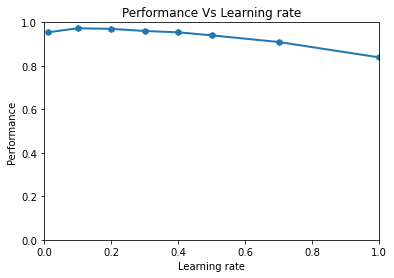

In [7]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate

parray=[]  # Empty List to store values of performance for different values of learning rates
lr=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]

for i in range(len(lr)):
    learning_rate = lr[i]

    # create instance of neural network
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()

    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass

    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

    scorecard_array = numpy.asarray(scorecard)
    performance= scorecard_array.sum() / scorecard_array.size
    parray.append(performance)
print(parray)

# We store and print the performance of ANN for different learning rates in an list named parray.

fig, ax = plt.subplots()

ax.plot(lr, parray, linewidth=2.0,marker="h")
#plt.plot(lr,parray)

ax.set_ylabel('Performance')
ax.set_xlabel('Learning rate')
ax.set_title('Performance Vs Learning rate')

ax.set(xlim=(0, 1),
       ylim=(0, 1))

plt.show()

After the first (successful) run add two additional values to get a more detailed picture of the area with the best performance.
Use a graph to visualize the result.
Adding two additional values of 0.05 and 0.15 of learning rate to get a more detailed picture of the area with the -
best performance

[0.9541, 0.972, 0.9751, 0.9728, 0.9705, 0.9577, 0.9478, 0.9286, 0.9043, 0.8567]


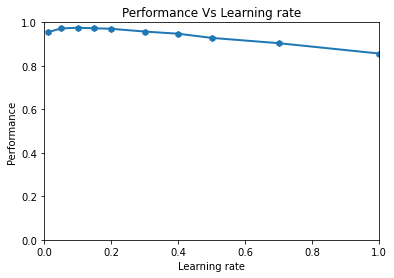

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
parray=[] # Empty List to store values of performance for different values of learning rates
lr=[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]
for i in range(len(lr)):
    learning_rate = lr[i]

    # create instance of neural network
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()

    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass

    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

    scorecard_array = numpy.asarray(scorecard)
    performance= scorecard_array.sum() / scorecard_array.size
    parray.append(performance)
print(parray)

# We store and print the performance of ANN for different learning rates in an list named parray.

fig, ax = plt.subplots()

ax.plot(lr, parray, linewidth=2.0,marker="h")
#plt.plot(lr,parray)

ax.set_ylabel('Performance')
ax.set_xlabel('Learning rate')
ax.set_title('Performance Vs Learning rate')

ax.set(xlim=(0, 1),
       ylim=(0, 1))

plt.show()

In [ ]:
# 1) We observe best performance of 0.9751 for a learning rate of 0.1
# 2) Very small learning rate(0.01) does not give peak performance as very small learning rates have more possibility of -
#    getting stuck in local minima.
# 3) large learning rate(0.5) does not give peak performance as large leraning rates have more possibility of overshooting-
#    the minimum and bouncing around it.

## Task 3: Influence of number of epochs 

Take five leaning rates from task 2, that had shown reasonable performance, and test each of them with 1, 3, 5, 10, 50 epochs.
Visualize the results (e.g. a heatmap).

Code:

[0.9068, 0.9462, 0.9631, 0.9726, 0.9778]
[0.955, 0.9717, 0.9726, 0.9712, 0.9604]
[0.9572, 0.9704, 0.9683, 0.9633, 0.9517]
[0.9509, 0.9613, 0.9597, 0.9519, 0.9463]
[0.948, 0.9515, 0.9486, 0.9488, 0.9408]


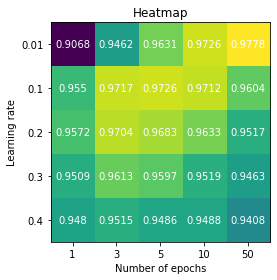

In [15]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
parray=[] # Empty List to store values of performance for different values of learning rates
lr=[0.01, 0.1, 0.2, 0.3, 0.4]
for i in range(len(lr)):
    learning_rate = lr[i]

    # create instance of neural network
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()

    # train the neural network

    # epochs is the number of times the training data set is used for training
    earray=[] # Empty List to store values of performance for different values of epochs
    ep=[1,3,5,10,50]
    for i in range(len(ep)):
        epochs = ep[i]

        for e in range(epochs):
            # go through all records in the training data set
            for record in training_data_list:
                # split the record by the ',' commas
                all_values = record.split(',')
                # scale and shift the inputs
                inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                # create the target output values (all 0.01, except the desired label which is 0.99)
                targets = numpy.zeros(output_nodes) + 0.01
                # all_values[0] is the target label for this record
                targets[int(all_values[0])] = 0.99
                n.train(inputs, targets)
                pass
            pass

        # load the mnist test data CSV file into a list
        test_data_file = open("mnist_test.csv", 'r')
        test_data_list = test_data_file.readlines()
        test_data_file.close()

        # scorecard for how well the network performs, initially empty
        scorecard = []

        # go through all the records in the test data set
        for record in test_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # correct answer is first value
            correct_label = int(all_values[0])
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # query the network
            outputs = n.query(inputs)
            # the index of the highest value corresponds to the label
            label = numpy.argmax(outputs)
            # append correct or incorrect to list
            if (label == correct_label):
                #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
                # network's answer matches correct answer, add 1 to scorecard
                scorecard.append(1)
            else:
                #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
                # network's answer doesn't match correct answer, add 0 to scorecard
                scorecard.append(0)
                pass
            pass

        scorecard_array = numpy.asarray(scorecard)
        performance= scorecard_array.sum() / scorecard_array.size
        earray.append(performance)
        # We store the performance of ANN for a learning rates with different values of epochs in an list named earray.
    parray.append(earray)
    # In list parray we append the list earray
    print(earray)


narr=numpy.asarray(parray)
fig, ax = plt.subplots()
im = ax.imshow(parray)

ax.set_xticks(numpy.arange(len(ep)))
ax.set_yticks(numpy.arange(len(lr)))
ax.set_xticklabels(ep)
ax.set_yticklabels(lr)

ax.set_ylabel('Learning rate')
ax.set_xlabel('Number of epochs')
ax.set_title('Heatmap')

for i in range(len(lr)):
    for j in range(len(ep)):
        text = ax.text(j, i, narr[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

In [ ]:
# Observed Results:
# 1) The best performance of 0.9778 is achieved with a learning rate of 0.01 & 50 epochs.
# 2) Increasing the epochs does not always lead to improvement in performance (eg. For learning rate of 0.4 performance for-
#    5 epochs is better than performance with 50 epochs.
# 3) There is no particular formula to find the best combination, and the best combination can be found out by calculating the-
#    performance for different learning rates and number of epochs.

## Task 4: Size of the hidden layer 

Getting a good combination of learning rate and number of epochs from task 3 (good results, not too much computing time) and try at least 10 different sizes of the hidden layer in the range of 5 to 1000.
Output the performance and the time the training and testing took.

Code:

In [ ]:
# We select good combination of learning rate and epochs referring the Heatmap 
# Learning rate of 0.1 and 5 epochs give relatively optimum performance of 0.9726
# With a learning rate of 0.01 and 50 epochs we get better performance of 0.9778 but it will result in too much computing time.

[0.7599, 0.965, 0.9725, 0.9744, 0.9754, 0.976, 0.9749, 0.9759, 0.9763, 0.976]
[54.61332869529724, 704.0215599536896, 984.887318611145, 1800.6285173892975, 1518.766893863678, 1839.7960970401764, 2309.8080010414124, 2292.896783351898, 3383.983973503113, 6583.243529319763]
[1.5273516178131104, 11.472503900527954, 10.5850989818573, 13.3162841796875, 8.603413105010986, 11.552580118179321, 8.983853101730347, 15.476315259933472, 11.890166997909546, 22.485649347305298]


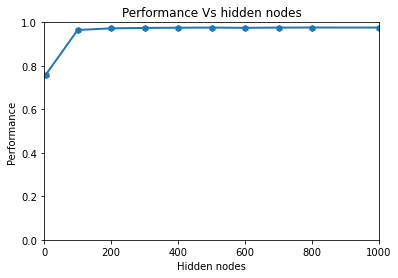

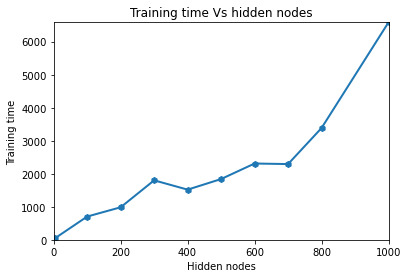

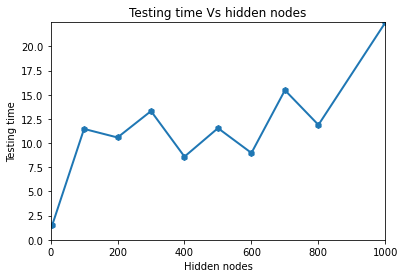

In [18]:
# number of input, hidden and output nodes
input_nodes = 784
output_nodes = 10
# learning rate
learning_rate = 0.1

harray=[]  # Empty List to store values of performance for different number of hidden layers
trtime=[]  # Empty List to store training time of performance for different number of nodes in hidden layers
tstime=[]  # Empty List to store testing time for different number of nodes in hidden layers

lhidden_nodes=[5,100,200,300,400,500,600,700,800,1000]

for i in range(len(lhidden_nodes)):
    hidden_nodes = lhidden_nodes[i]

    # create instance of neural network
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

    # load the mnist training data CSV file into a list
    
    trs=time.time() # Start of measuring time required for training the ANN
    
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()

    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
        pass
    
    tre=time.time() # End of measuring time required for training the ANN

    tss=time.time() # Start of measuring time required for testing the ANN
    
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    
    tse=time.time() # End of measuring time required for testing the ANN
    
    trainingtime=tre-trs # Time required for training full MNIST dataset
    testingtime=tse-tss  # Time required for testing full MNIST dataset
    scorecard_array = numpy.asarray(scorecard)
    performance= scorecard_array.sum() / scorecard_array.size
    harray.append(performance)
    # We store and print the performance of ANN for different number of hidden nodes in an list named harray.
    trtime.append(trainingtime)
    # We store and print the training time for ANN for different number of hidden nodes in an list named trtime.
    tstime.append(testingtime)
    # We store and print the testing time for ANN for different number of hidden nodes in an list named tstime.

print(harray)
print(trtime)
print(tstime)

fig, ax = plt.subplots()

ax.plot(lhidden_nodes, harray, linewidth=2.0,marker="h")
#plt.plot(lr,parray)

ax.set_ylabel('Performance')
ax.set_xlabel('Hidden nodes')
ax.set_title('Performance Vs hidden nodes')

ax.set(xlim=(0, 1000),
       ylim=(0, 1))

fig, axt = plt.subplots()

axt.plot(lhidden_nodes, trtime, linewidth=2.0,marker="h")
#plt.plot(lr,parray)

axt.set_ylabel('Training time')
axt.set_xlabel('Hidden nodes')
axt.set_title('Training time Vs hidden nodes')

axt.set(xlim=(0, 1000),
       ylim=(0, (max(trtime)+0.5)))

fig, axs = plt.subplots()

axs.plot(lhidden_nodes, tstime, linewidth=2.0,marker="h")
#plt.plot(lr,parray)

axs.set_ylabel('Testing time')
axs.set_xlabel('Hidden nodes')
axs.set_title('Testing time Vs hidden nodes')

axs.set(xlim=(0, 1000),
       ylim=(0, (max(tstime)+0.01)))

plt.show()

In [ ]:
# 1) We get an optimum performance of 0.976 for 500 hidden nodes. After this with increase in the number of hidden nodes, -
#    the performance remains more or less constant.
# 2) It is also evident that the training time and testing time increases with increase in the number of hidden nodes.
# 3) The optimum combination is the one which gives the desired performance accuracy with the least amount of training and-
#    testing time.

## Task 5: Other activation function 

Search for other possible activation functions and choose one (e.g. tanh). Implement this activation function in an ANN and compare it to our existing ANN using one set of parameters (utilize task 3 to chose a reasonable one).

Code:

In [ ]:
# Activation function : tanh
# ANN with tanh activation function implemented for two learning rates to study variation in performance
# 1)Parameters (Learning rate=0.05 and 5 epochs)  
# 2)Parameters (Learning rate=0.1 and 5 epochs)

In [17]:
import numpy

# class definition for the core structure
class tneuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function is the tanh function
        self.activation_function = lambda x: numpy.tanh(x)

        pass



    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot(output_errors * (1-(final_outputs)**2), numpy.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(hidden_errors *(1-(hidden_outputs)**2), numpy.transpose(inputs))

        pass


    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.05

# create instance of neural network
n = tneuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance with tanh activation function is ", scorecard_array.sum() / scorecard_array.size)


Performance with tanh activation function is  0.8722


In [18]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nt1 = tneuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nt1.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nt1.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance with tanh activation function is ", scorecard_array.sum() / scorecard_array.size)

Performance with tanh activation function is  0.1898


In [ ]:
# The comparision is not fair as we have initialised the random initial weights taking specific shapes of networks -
# (Sigmoid in our case) into consideration.
# If the random initial weights are updeted taking into consideration tanh activation function, the comparion will be fair. 

# Performance with tanh activation function for (Learning rate=0.05 and 5 epochs) is  0.8722
# Performance with tanh activation function for (Learning rate=0.1 and 5 epochs) is 0.1898  
# Performance with Sigmoid activation function with same parameters (Learning rate=0.1 and 5 epochs)  is  0.9723

# 1)From the above results, it is evident that ANN with tanh activation function provides satisfactory results for a -
#   small learning rate of 0.05, it doesn't provide satisfactory result for a learning rate of 0.1.
# 2)Best results for our ANN obtained for Sigmoid Activation function because of the reason mentioned above.

## Task 6: More Layer

Add a second hidden layer to our (original) neural network.    
Compare the ANN with at least 5 different eamples to a three layer network with the same (total) number of hidden nodes. Choose the other parameters from your experience.

Code:

In [9]:
# Defined Class for an ANN with two hidden layers

import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# class definition for the core structure
class NneuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes

        # link weight matrices, wih1,wih1h2 and wh2o

        self.wih1 = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes1, self.inodes))
        self.wih1h2 = numpy.random.normal(0.0, pow(self.hnodes1, -0.5), (self.hnodes2, self.hnodes1))
        self.wh2o = numpy.random.normal(0.0, pow(self.hnodes2, -0.5), (self.onodes, self.hnodes2))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass


    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into first hidden layer
        hidden_inputs1 = numpy.dot(self.wih1, inputs)
        # calculate the signals emerging from first hidden layer
        hidden_outputs1 = self.activation_function(hidden_inputs1)

        # calculate signals into second hidden layer
        hidden_inputs2 = numpy.dot(self.wih1h2, hidden_outputs1)
        # calculate the signals emerging from second hidden layer
        hidden_outputs2 = self.activation_function(hidden_inputs2)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.wh2o, hidden_outputs2)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors2 = numpy.dot(self.wh2o.T, output_errors)
        # hidden layer error is the hidden layer 2, split by weights, recombined at hidden nodes
        hidden_errors1 = numpy.dot(self.wih1h2.T, hidden_errors2)

        # update the weights for the links between the hidden and output layers
        self.wh2o += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs2))

        # update the weights for the links between the hidden layer 1 and hidden layer 2
        self.wih1h2 += self.lr * numpy.dot((hidden_errors2 * hidden_outputs2 * (1.0 - hidden_outputs2)), numpy.transpose(hidden_outputs1))

        # update the weights for the links between the input and hidden layers
        self.wih1 += self.lr * numpy.dot((hidden_errors1 * hidden_outputs1 * (1.0 - hidden_outputs1)), numpy.transpose(inputs))

        pass


    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into first hidden layer
        hidden_inputs1 = numpy.dot(self.wih1, inputs)
        # calculate the signals emerging from first hidden layer
        hidden_outputs1 = self.activation_function(hidden_inputs1)

        # calculate signals into second hidden layer
        hidden_inputs2 = numpy.dot(self.wih1h2, hidden_outputs1)
        # calculate the signals emerging from second hidden layer
        hidden_outputs2 = self.activation_function(hidden_inputs2)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.wh2o, hidden_outputs2)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes1 = 120
hidden_nodes2 = 80
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn = NneuralNetwork(input_nodes,hidden_nodes1,hidden_nodes2,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 4L: 784,120,80,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 4L: 784,120,80,10 ANN =  0.9076


In [5]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes1 = 150
hidden_nodes2 = 50
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn1 = NneuralNetwork(input_nodes,hidden_nodes1,hidden_nodes2,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn1.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn1.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 4L: 784,150,50,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 4L: 784,150,50,10 ANN =  0.9312


In [8]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes1 = 80
hidden_nodes2 = 120
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn2 = NneuralNetwork(input_nodes,hidden_nodes1,hidden_nodes2,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn2.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn2.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 4L: 784,80,120,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 4L: 784,80,120,10 ANN =  0.9014


In [ ]:
# Total Hidden nodes = 200 with learning rate of 0.1 and 5 epochs.

# Performance for 3L: 784,200,10 ANN =  0.9726 (Reference Task 3 Heatmap)

# Performance for 4L: 784,120,80,10 ANN =  0.9076
# Performance for 4L: 784,150,50,10 ANN =  0.9312
# Performance for 4L: 784,80,120,10 ANN =  0.9014

In [10]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes1 = 200
hidden_nodes2 = 100
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn3 = NneuralNetwork(input_nodes,hidden_nodes1,hidden_nodes2,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn3.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn3.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 4L: 784,200,100,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 4L: 784,200,100,10 ANN =  0.9183


In [11]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes1 = 250
hidden_nodes2 = 50
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nn4 = NneuralNetwork(input_nodes,hidden_nodes1,hidden_nodes2,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn4.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn4.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 4L: 784,250,50,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 4L: 784,250,50,10 ANN =  0.9264


In [15]:


# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 300
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
nc = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nc.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nc.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("Performance for 3L: 784,300,10 ANN = ", scorecard_array.sum() / scorecard_array.size)

Performance for 3L: 784,300,10 ANN =  0.9731


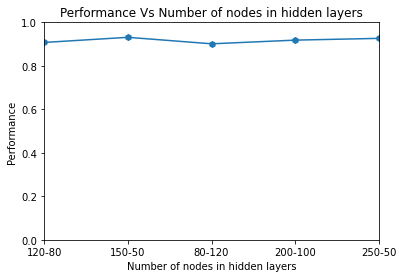

In [2]:
# Plotting the results obtained
import matplotlib.pyplot as plt
import numpy
larr=["120-80","150-50","80-120","200-100","250-50"]
yarr=[0.9076,0.9312,0.9014,0.9183,0.9264]

fig, ax = plt.subplots()

ax.plot(larr, yarr,marker="h")
#plt.plot(lr,parray)

ax.set_xticks(numpy.arange(len(larr)))
ax.set_xticklabels(larr)


ax.set_ylabel('Performance')
ax.set_xlabel('Number of nodes in hidden layers')
ax.set_title('Performance Vs Number of nodes in hidden layers')

ax.set(xlim=(0, 4),
       ylim=(0, 1))

plt.show()

In [ ]:
# Total Hidden nodes = 200 with learning rate of 0.1 and 5 epochs.

# Performance for 3L: 784,200,10 ANN =  0.9726 (Reference Task 3 Heatmap)

# 1) Performance for 4L: 784,120,80,10 ANN =  0.9076
# 2) Performance for 4L: 784,150,50,10 ANN =  0.9312
# 3) Performance for 4L: 784,80,120,10 ANN =  0.9014

# # Total Hidden nodes = 300 with learning rate of 0.1 and 5 epochs.

# Performance for 3L: 784,300,10 ANN =  0.9731

# 4) Performance for 4L: 784,200,100,10 ANN =  0.9183
# 5) Performance for 4L: 784,250,50,10 ANN =  0.9264

# 1) Selection of hidden layers is very difficult task as in some cases due to the number of hidden layers a condition known -
#    as overfitting and underfitting occurs.
# 2) Overfitting condition occurs when the number of hidden layers become very large as compared to the complexity of the-
#    problem due to which a process of overtraining of the network starts and badly effects the time complexity.
# 3) Underfitting condition occurs when the number of hidden layers in the network becomes less than complexity of the problem -
#    as network barely handles such problems. 

#    In case of our artificial neural network, best results are obtained for a single hidden layer.
#    The comparion is fair as we compare with rspective ANN with the same activation function, same number of epoch,-
#    same  learning rate and same dataset.